# Thibault Berard et Valentin Cuzin-Rambaud

# 0 Import

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
from sklearn.neighbors import KNeighborsClassifier
import gensim
from gensim import downloader
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

import tp2_function as tp2

# 1. copy from the code of part 1

In [2]:
data=pd.read_csv('PubMed-multi-label-dataset.csv',sep=',')
labels = data.iloc[:, -14:]
print(len(data))
data.head(3)

50000


,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0


In [3]:
title = data['Title'].astype(str)
abstractText = data['abstractText'].astype(str)
corpus = data['abstractText'].astype(str) + data['Title'].astype(str)
title = tp2.clean_data(title)
abstractText = tp2.clean_data(abstractText)
corpus = tp2.clean_data(corpus)

In [4]:
base_estimator = {
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'MLP' : MLPClassifier(hidden_layer_sizes=(100, 100)),
}

In [5]:
tfidf, tfidf_dict = tp2.get_tfidf(corpus)
tfidf_dict

{'aa': 8.72875583085197,
 'aaa': 8.20888037156606,
 'aaaag': 11.12665110365034,
 'aaad': 11.12665110365034,
 'aaala': 11.12665110365034,
 'aaar': 11.12665110365034,
 'aab': 10.433503923090395,
 'aaba': 11.12665110365034,
 'aabb': 10.210360371776185,
 'aabd': 11.12665110365034,
 'aabo': 11.12665110365034,
 'aabr': 11.12665110365034,
 'aac': 9.622573706874066,
 'aacct': 11.12665110365034,
 'aacgcgcaac': 11.12665110365034,
 'aachen': 10.210360371776185,
 'aacn': 10.721185995542177,
 'aacr': 9.111748083108075,
 'aact': 10.721185995542177,
 'aactaac': 11.12665110365034,
 'aacu': 11.12665110365034,
 'aad': 9.622573706874066,
 'aada': 10.028038814982231,
 'aadb': 11.12665110365034,
 'aadt': 11.12665110365034,
 'aae': 11.12665110365034,
 'aaee': 11.12665110365034,
 'aael': 11.12665110365034,
 'aaf': 9.873888135154973,
 'aag': 9.421903011411915,
 'aagaatg': 11.12665110365034,
 'aaggg': 11.12665110365034,
 'aagl': 11.12665110365034,
 'aagpr': 11.12665110365034,
 'aagr': 11.12665110365034,
 'aags

# 2. Apprentissage Word2Vec

In [12]:
corpus_w2v = corpus.apply(lambda line : gensim.utils.simple_preprocess((line)))
corpus_w2v

KeyboardInterrupt: 

In [ ]:
import multiprocessing
cores=multiprocessing.cpu_count()
cores

In [14]:
model_size=100
model=gensim.models.Word2Vec(corpus_w2v, vector_size=model_size, sg=0, window=5, min_count=2, workers=cores-1)

In [ ]:
for i in range(100):
    model.train(corpus_w2v, total_examples=len(corpus_w2v), epochs=1)
    print(i, end=' ')
model.save('./Word2vec_entraine.h5')
len(model.wv.index_to_key)

# 3. Évaluation visuelle et numérique 

In [6]:
model = gensim.models.Word2Vec.load('./Word2vec_entraine.h5')
model.wv['skin']

array([-0.33990526,  0.9991178 , -1.73055   , -0.28057903, -0.18515623,
       -1.3902289 ,  0.488083  , -2.0213697 , -1.7514632 ,  0.4234695 ,
       -0.3640838 , -0.43586066,  1.1808934 ,  0.0145522 , -1.7912756 ,
       -0.55294055, -1.8897227 ,  1.9499478 ,  0.38567328,  1.6376733 ,
       -0.52258927,  0.3422506 ,  0.06752758,  0.35171536,  1.3373713 ,
        0.6240536 , -1.5170554 , -1.5367628 ,  0.6870212 , -0.68103004,
        0.5315997 , -1.101151  ,  0.49097437,  1.5190381 , -1.7705343 ,
       -0.12517491,  1.4255102 , -0.2247081 , -0.98151547,  0.91819483,
       -0.55180085,  1.3217809 ,  0.39624816,  0.49531707,  0.62384135,
       -0.8635777 , -0.3322685 , -0.12270564, -0.46570882, -0.94976556,
       -0.84522104,  2.2874854 ,  2.5090816 ,  1.0167418 ,  1.6990085 ,
        0.6434775 ,  0.29898688, -1.7293171 ,  1.8540182 , -0.6020802 ,
       -2.071183  , -2.3541682 , -2.2452316 ,  1.0834701 , -1.248147  ,
        1.065177  ,  0.6716431 , -0.6966418 ,  1.4723172 ,  2.59

In [7]:
model.wv.most_similar(positive='skin',topn=10)

[('dermal', 0.49840280413627625),
 ('mucos', 0.4916006028652191),
 ('epidermi', 0.47962212562561035),
 ('conjunctiv', 0.4774688184261322),
 ('cutan', 0.47446808218955994),
 ('gingiv', 0.46672454476356506),
 ('foot', 0.4625208079814911),
 ('estland', 0.45937302708625793),
 ('hindpaw', 0.44686359167099),
 ('adnex', 0.4430582523345947)]

In [8]:
model.wv.doesnt_match(['skin','background','dermal'])

'background'

In [9]:
model.wv.most_similar(positive=['man','woman'],negative=['man'],topn=1)

[('women', 0.5424184203147888)]

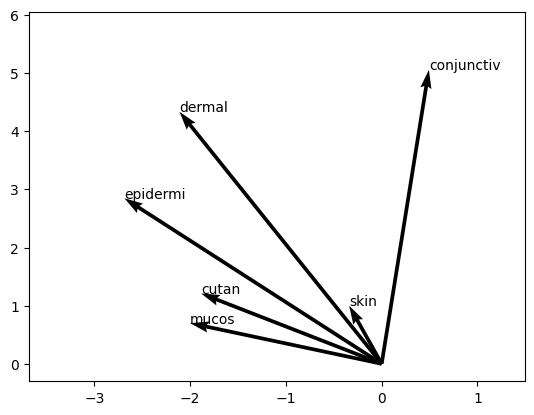

In [10]:
tp2.plot_word_vec(model, 'skin', 5)

# 4. Vecteur Word2Vec

## 4.1 Word2Vec seul

In [12]:
title_wv = title.apply(tp2.encode_sentence2, model=model)
abstractText_wv = abstractText.apply(tp2.encode_sentence2, model=model)
corpus_wv = corpus.apply(tp2.encode_sentence2, model=model)

## 4.2 Word2Vec + TF-IDF

In [15]:
title_wv_tfidf = title.apply(tp2.encode_sentence, model=model, tfidf_dict=tfidf_dict)
abstractText_wv_tfidf= abstractText.apply(tp2.encode_sentence, model=model, tfidf_dict=tfidf_dict)
corpus_wv_tfidf= corpus.apply(tp2.encode_sentence, model=model, tfidf_dict=tfidf_dict)

# 4.3 Google Word2Vec

In [11]:
pretrain_model = gensim.downloader.load('word2vec-google-news-300')

In [15]:
title_wv_tfidf_google = title.apply(tp2.encode_sentence, model=pretrain_model, tfidf_dict=tfidf_dict)
abstractText_wv_tfidf_google = abstractText.apply(tp2.encode_sentence, model=pretrain_model, tfidf_dict=tfidf_dict)
corpus_wv_tfidf_google = corpus.apply(tp2.encode_sentence, model=pretrain_model, tfidf_dict=tfidf_dict)

In [12]:
title_wv_google = title.apply(tp2.encode_sentence2, model=pretrain_model)
abstractText_wv_google = abstractText.apply(tp2.encode_sentence2, model=pretrain_model)
corpus_wv_google = corpus.apply(tp2.encode_sentence2, model=pretrain_model)

# 5. Comparaison Final

In [16]:
print('\n Simple Word2Vec \n')
print("data 1: title")
tp2.run_model(title_wv, labels, base_estimator)
print("data 2: abstractText")
tp2.run_model(abstractText_wv, labels, base_estimator)
print("data 3: corpus")
tp2.run_model(corpus_wv, labels, base_estimator)


 Simple Word2Vec 

data 1: title
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.8050878611866774
f1 macro 0.6790763986267729
0/1 loss 0.89908
----------ClassifierChain----------
f1 micro 0.8062233694516803
f1 macro 0.6811903248164106
0/1 loss 0.8975599999999999
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.781677322512652
f1 macro 0.6713007707742872
0/1 loss 0.92632
----------ClassifierChain----------
f1 micro 0.7815036823822048
f1 macro 0.6700509713162568
0/1 loss 0.91918
data 2: abstractText
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.8243126471524578
f1 macro 0.714557534451225
0/1 loss 0.87364
----------ClassifierChain----------
f1 micro 0.8231690268835238
f1 macro 0.71336549396692
0/1 loss 0.8762000000000001
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.8033473684210526
f1 macro 0.700174

In [37]:
print('\n Simple Word2Vec+tfidf \n')
print("data 1: title")
tp2.run_model(title_wv_tfidf, labels, base_estimator)
print("data 2: abstractText")
tp2.run_model(abstractText_wv_tfidf, labels, base_estimator)
print("data 3: corpus")
tp2.run_model(corpus_wv_tfidf, labels, base_estimator)


 Simple Word2Vec+tfidf 

data 1: title
################## KNN ##################
----------MultiOutputClassifier----------
0.788592405577562
0.6591169538212941
0.9112
----------ClassifierChain----------
0.7882399047812582
0.6590549507424353
0.91128
################## MLP ##################
----------MultiOutputClassifier----------
0.7717384790555523
0.6575956121213042
0.93544
----------ClassifierChain----------
0.7746050670640835
0.6618897042234517
0.93392
data 2: abstractText
################## KNN ##################
----------MultiOutputClassifier----------
0.8108215420155934
0.6982148887596785
0.8835999999999999
----------ClassifierChain----------
0.8108215420155934
0.6982148887596785
0.8835999999999999
################## MLP ##################
----------MultiOutputClassifier----------
0.7806945755954254
0.6787744925200004
0.92936
----------ClassifierChain----------
0.7857192664388816
0.6805756677912312
0.92772
data 3: corpus
################## KNN ##################
----------Mult

In [13]:
print('\n Google Word2Vec \n')
print("data 1: title")
tp2.run_model(title_wv_google, labels, base_estimator)
print("data 2: abstractText")
tp2.run_model(abstractText_wv_google, labels, base_estimator)
print("data 3: corpus")
tp2.run_model(corpus_wv_google, labels, base_estimator)


 Google Word2Vec 

data 1: title
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6466076696165192
f1 macro 0.2885653857190853
0/1 loss 0.95644
----------ClassifierChain----------
f1 micro 0.6815545917147638
f1 macro 0.3379271865141697
0/1 loss 0.96428
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6591986856353385
f1 macro 0.29288256444218747
0/1 loss 0.9912
----------ClassifierChain----------
f1 micro 0.6466076696165192
f1 macro 0.2885653857190853
0/1 loss 0.95644
data 2: abstractText
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6464166955898654
f1 macro 0.28862632807564204
0/1 loss 0.9954
----------ClassifierChain----------
f1 micro 0.6485027829191645
f1 macro 0.30775347700521083
0/1 loss 0.9743999999999999
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6589936219681957
f1 macro 0.292938517878

In [20]:
print('\n Google Word2Vec+tfidf \n')
print("data 1: title")
tp2.run_model(title_wv_tfidf_google, labels, base_estimator)
print("data 2: abstractText")
tp2.run_model(abstractText_wv_tfidf_google, labels, base_estimator)
print("data 3: corpus")
tp2.run_model(corpus_wv_tfidf_google, labels, base_estimator)


 Google Word2Vec+tfidf 

data 1: title
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6192707305845992
f1 macro 0.24405615092330754
0/1 loss 0.98332
----------ClassifierChain----------
f1 micro 0.6192707305845992
f1 macro 0.24405615092330754
0/1 loss 0.98332
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6604326306687737
f1 macro 0.29357433521921444
0/1 loss 0.991
----------ClassifierChain----------
f1 micro 0.6488789170816065
f1 macro 0.2896336225079156
0/1 loss 0.9542
data 2: abstractText
################## KNN ##################
----------MultiOutputClassifier----------
f1 micro 0.6961472645830188
f1 macro 0.3811420684024931
0/1 loss 0.99064
----------ClassifierChain----------
f1 micro 0.6624012280436862
f1 macro 0.36854430934598525
0/1 loss 0.99416
################## MLP ##################
----------MultiOutputClassifier----------
f1 micro 0.6597811156235069
f1 macro 0.29311820013934214